In [1]:
########################################################################################################
# IMPORT LIBRARIES
########################################################################################################
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import cov
from scipy.stats import pearsonr
from scipy.stats import spearmanr

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
########################################################################################################
# Read dataset obtained from previous step where semantic scores are calculated
########################################################################################################
toyData=pd.read_csv("Toys_and_Games.csv");

In [3]:
toyData.head(3)

,asin,helpful,overall,reviewText,reviewTime,reviewerID,PreProcessed_reviewText,subjectivity_score,flesch_index,polarity_score,entropy_score,DaleChall_Index,helpful_ratio,lex_diversity
0,439893577,"[1, 1]",4,Love the magnet easel... great for moving to d...,"03 28, 2014",A8R62G708TSCM,love the magnet easel great for moving to diff...,0.65,8.3,0.433333,4.459432,7.588870,0.75,1.000000
1,439893577,"[1, 1]",5,Both sides are magnetic. A real plus when you...,"01 28, 2013",A21KH420DK0ICA,both sides are magnetic a real plus when your...,0.45,29.4,0.333333,5.497670,6.688048,0.20,0.684211
2,439893577,"[0, 0]",5,Bought one a few years ago for my daughter and...,"02 8, 2014",AR29QK6HPFYZ4,bought one a few years ago for my daughter and...,0.45,10.7,0.250000,4.389365,7.461429,0.50,0.741935


In [4]:
########################################################################################################
# Make groups of dataset based on distinct values  of column 'overall' and compute average values of
# each semantic score for each group
########################################################################################################
groupedData=toyData.groupby(['overall']).mean()
groupedData

,subjectivity_score,flesch_index,polarity_score,entropy_score,DaleChall_Index,helpful_ratio,lex_diversity
overall,,,,,,,
1,0.490288,40.075209,0.014873,5.627290,7.118534,0.677282,0.743511
2,0.494996,43.800651,0.064431,5.688458,7.103488,0.694040,0.731196
3,0.494427,46.525150,0.107736,5.694061,7.152669,0.701247,0.727437
4,0.495295,46.149033,0.157299,5.671198,7.175735,0.712894,0.733535
5,0.503174,37.072874,0.213936,5.457308,7.195066,0.699204,0.762014


In [0]:
########################################################################################################
# Add column 'overall' to grouped data
########################################################################################################
groupedData['overall']=[1,2,3,4,5]

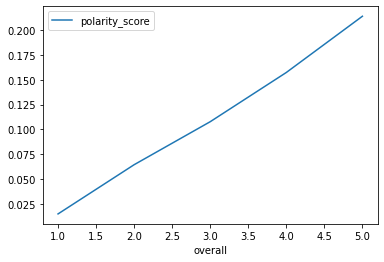

In [6]:
########################################################################################################
# Visualize line plot on grouped data for 'polarity_score' column vs 'overall' column
########################################################################################################
lines=groupedData.plot.line(x='overall',y='polarity_score')

In [7]:
########################################################################################################
# Compute covariance between 'overall' and 'polarity_score' columns
########################################################################################################
covariance = cov(toyData['overall'], toyData['polarity_score'])
print(covariance)

[[0.98624719 0.05049651]
 [0.05049651 0.03079788]]


In [8]:
########################################################################################################
# Compute pearson correlation between 'overall' and 'polarity_score' columns
########################################################################################################
corr, _ = pearsonr(toyData['overall'], toyData['polarity_score'])
print('Pearsons correlation between rating and polarity_score is: %.3f' % corr)

Pearsons correlation between rating and polarity_score is: 0.290


In [9]:
########################################################################################################
# Compute spearnmans correlation between 'overall' and 'polarity_score' columns
########################################################################################################
corr, _ = spearmanr(toyData['overall'], toyData['polarity_score'])
print('Spearmans correlation between rating and polarity_score is: %.3f' % corr)

Spearmans correlation between rating and polarity_score is: 0.281


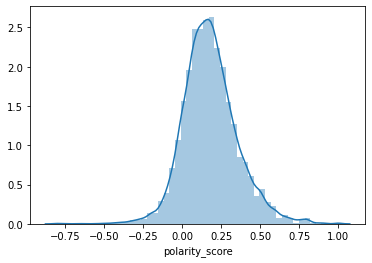

In [10]:
########################################################################################################
# Visualize distplot of 'polarity_score' column
########################################################################################################
sns.distplot(toyData.polarity_score)
plt.show()

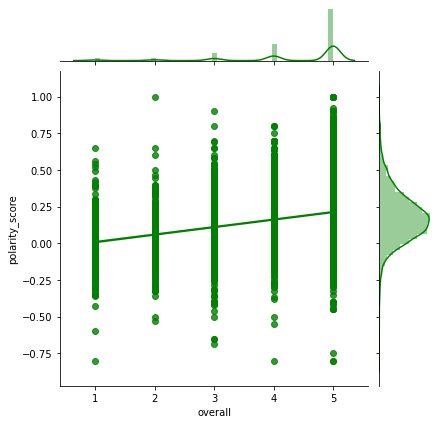

In [11]:
########################################################################################################
# Visualize jointplot of 'polarity_score' column again 'overall' column
########################################################################################################
sns.jointplot(data=toyData, x='overall', y='polarity_score', kind='reg', color='g')
plt.show()